# Problem 4 (for ASTRON 414 Students)

If you don't have REBOUND installed or are running the notebook through Google Colab, you need to run the following line first

In [1]:
!pip install rebound

In [2]:
import numpy as np
import rebound
import matplotlib.pylab as plt
%matplotlib inline

(<Figure size 360x360 with 1 Axes>, <Axes: xlabel='x [AU]', ylabel='y [AU]'>)

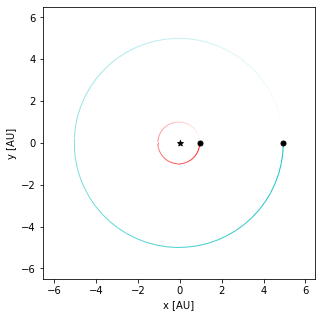

In [41]:
sim = rebound.Simulation()
sim.units = ('yr', 'AU', 'Msun')

sim.add(m=1.)                # Central star, 1 Msun
sim.add(m=0, a=1, e=0.05)        # Massless test particle at 1 au
sim.add(m=1e-3, a=5., e=0.01) # Jupiter mass planet at 5 au
sim.move_to_com()


rebound.OrbitPlot(sim, unitlabel="[AU]", color=True)

In [49]:
timesteps = np.arange(0, 500, 0.1) # simulate forward in time 50000 yrs in 0.5 year timesteps

tot_steps = len(timesteps)

sma_test = np.zeros(tot_steps)
ecc_test = np.zeros(tot_steps)
x_test = np.zeros(tot_steps)
y_test = np.zeros(tot_steps)

test_particle = sim.particles[1]

for index, t in enumerate(timesteps):
    sim.integrate(t)
    
    sma_test[index] = test_particle.a
    ecc_test[index] = test_particle.e
    x_test[index] = test_particle.x
    y_test[index] = test_particle.y

Text(0, 0.5, 'Ecc')

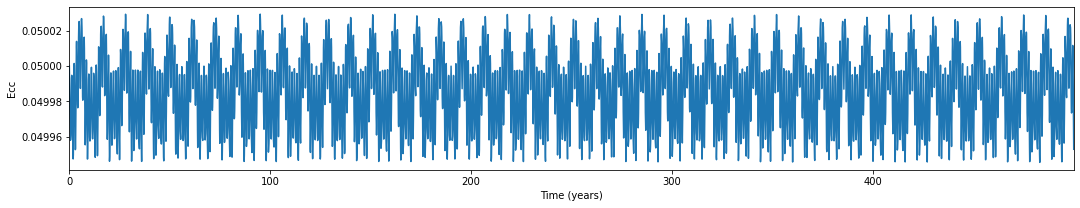

In [44]:
plt.figure(figsize=(18,3))
plt.plot(timesteps, ecc_test)
plt.xlim(0, timesteps[-1])

plt.xlabel("Time (years)")
plt.ylabel("Ecc")

(<Figure size 360x360 with 1 Axes>, <Axes: xlabel='x [AU]', ylabel='y [AU]'>)

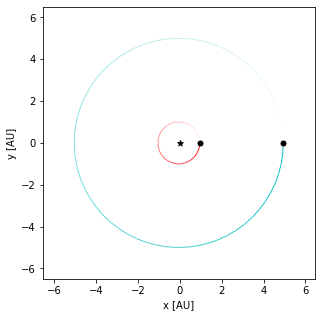

In [45]:
sim2 = rebound.Simulation()
sim2.units = ('yr', 'AU', 'Msun')

sim2.add(m=1.)                # Central star, 1 Msun
sim2.add(m=0, a=1, e=0.05)        # Massless test particle at 1 au
sim2.add(m=1e-3, a=5., e=0.01) # Jupiter mass planet at 5 au
sim2.move_to_com()

sim2.particles[1].x += 0.00001


rebound.OrbitPlot(sim2, unitlabel="[AU]", color=True)

In [50]:
sma_test2 = np.zeros(tot_steps)
ecc_test2 = np.zeros(tot_steps)
x_test2 = np.zeros(tot_steps)
y_test2 = np.zeros(tot_steps)

test_particle_2 = sim2.particles[1]

for index, t in enumerate(timesteps):
    sim2.integrate(t)
    
    sma_test2[index] = test_particle_2.a
    ecc_test2[index] = test_particle_2.e
    x_test2[index] = test_particle_2.x
    y_test2[index] = test_particle_2.y

Text(0, 0.5, 'X difference (AU)')

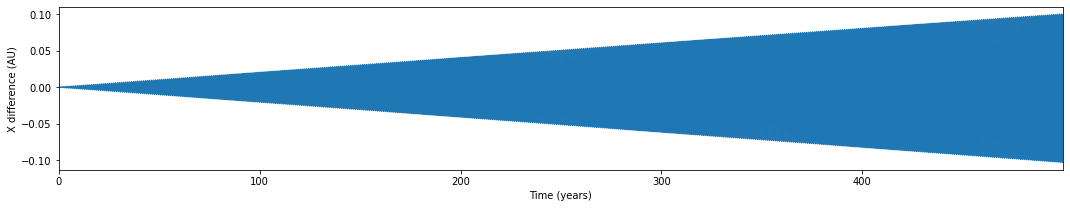

In [51]:
plt.figure(figsize=(18,3))
plt.plot(timesteps, x_test2 - x_test)
plt.xlim(0, timesteps[-1])

plt.xlabel("Time (years)")
plt.ylabel("X difference (AU)")